In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\archive (7).zip', compression='zip')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [5]:
df.drop(['Adj Close'], axis=1, inplace=True)

In [6]:
df.head()


,Date,Open,High,Low,Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,55297800


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,300.136008,307.486021,292.114058,299.709104,8.050938e+07
std,46.139272,46.789896,44.685331,45.788283,2.546595e+07
min,207.949997,217.973328,206.856674,209.386673,3.504270e+07
25%,266.513336,273.166656,260.723328,266.923340,6.255570e+07
50%,298.500000,303.709991,289.130005,296.666656,7.695630e+07
75%,335.600006,344.950012,327.510010,336.336670,9.347310e+07
max,411.470001,414.496674,405.666656,409.970001,1.885563e+08


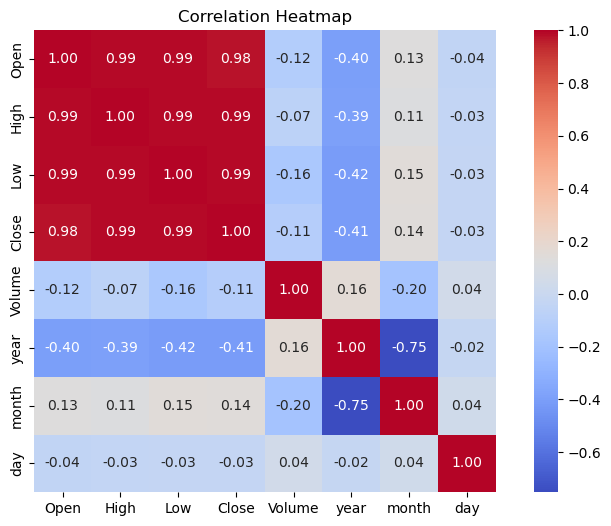

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Exploratory Data Analysis (EDA)

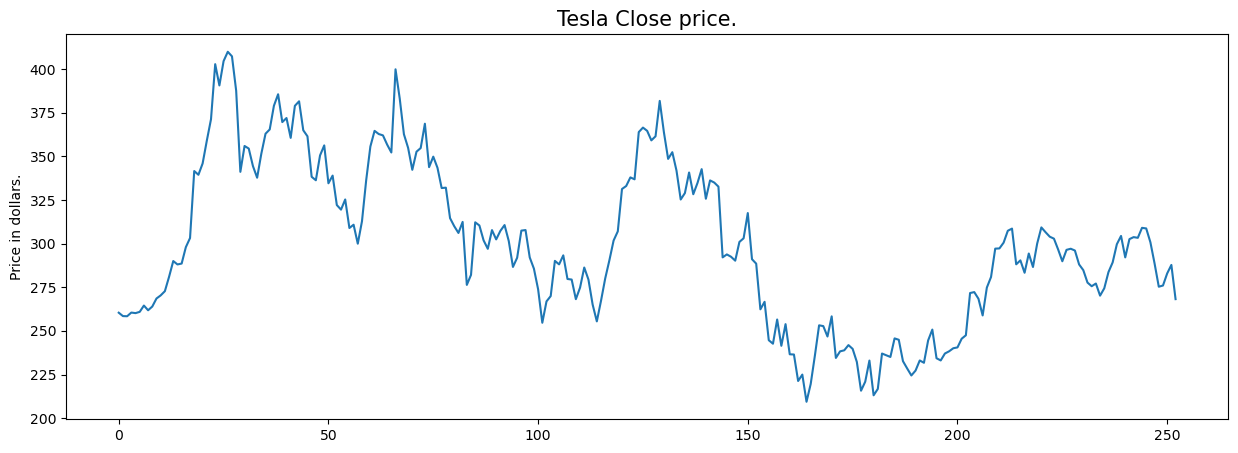

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

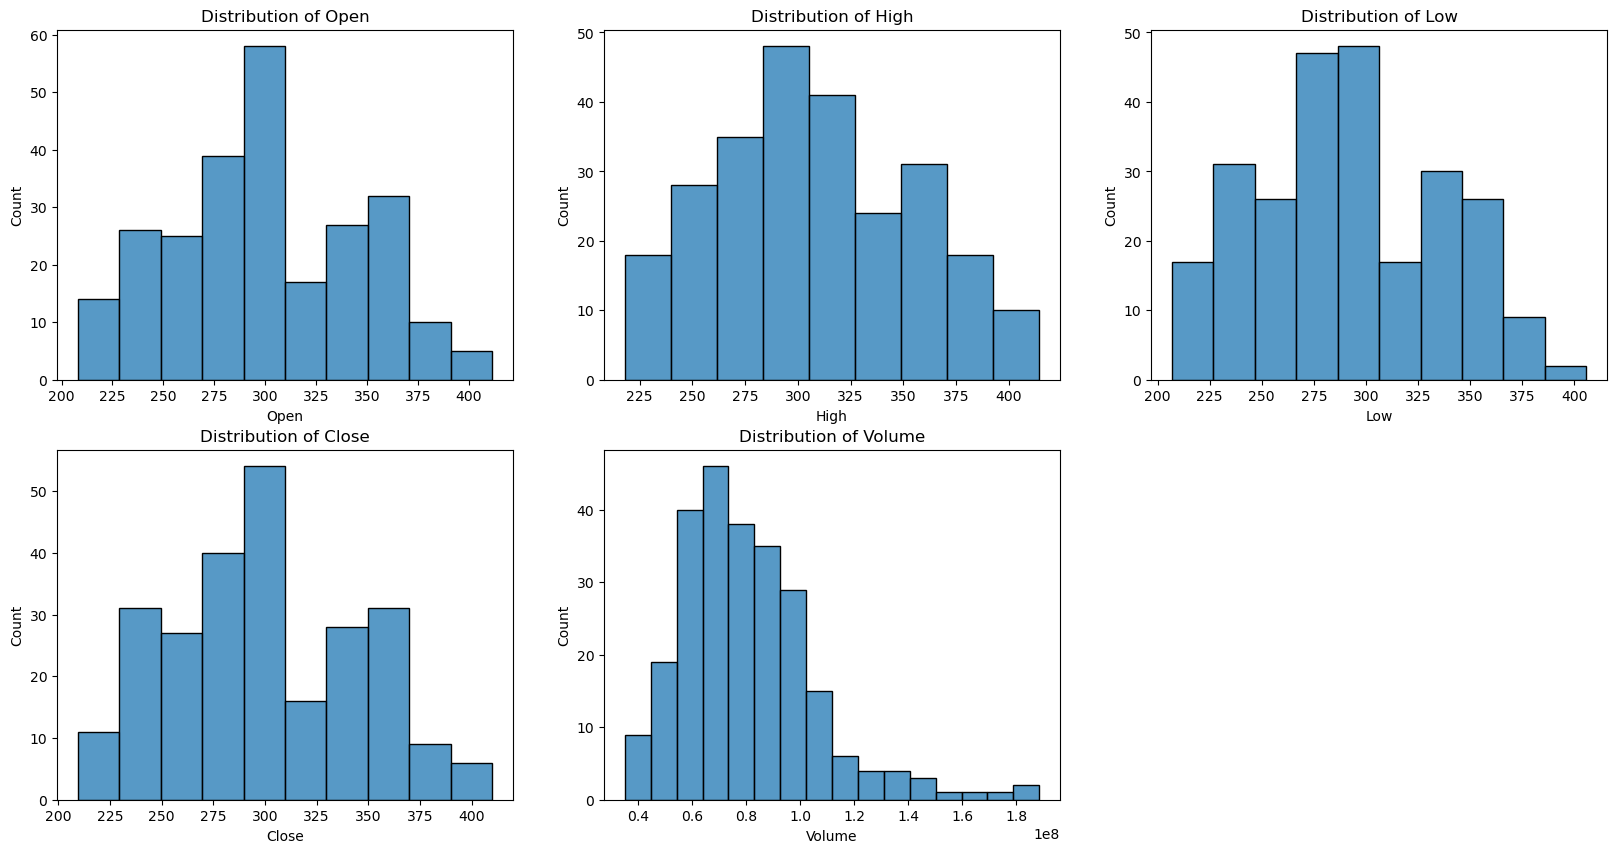

In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(x=df[col])
    plt.title(f'Distribution of {col}')
    

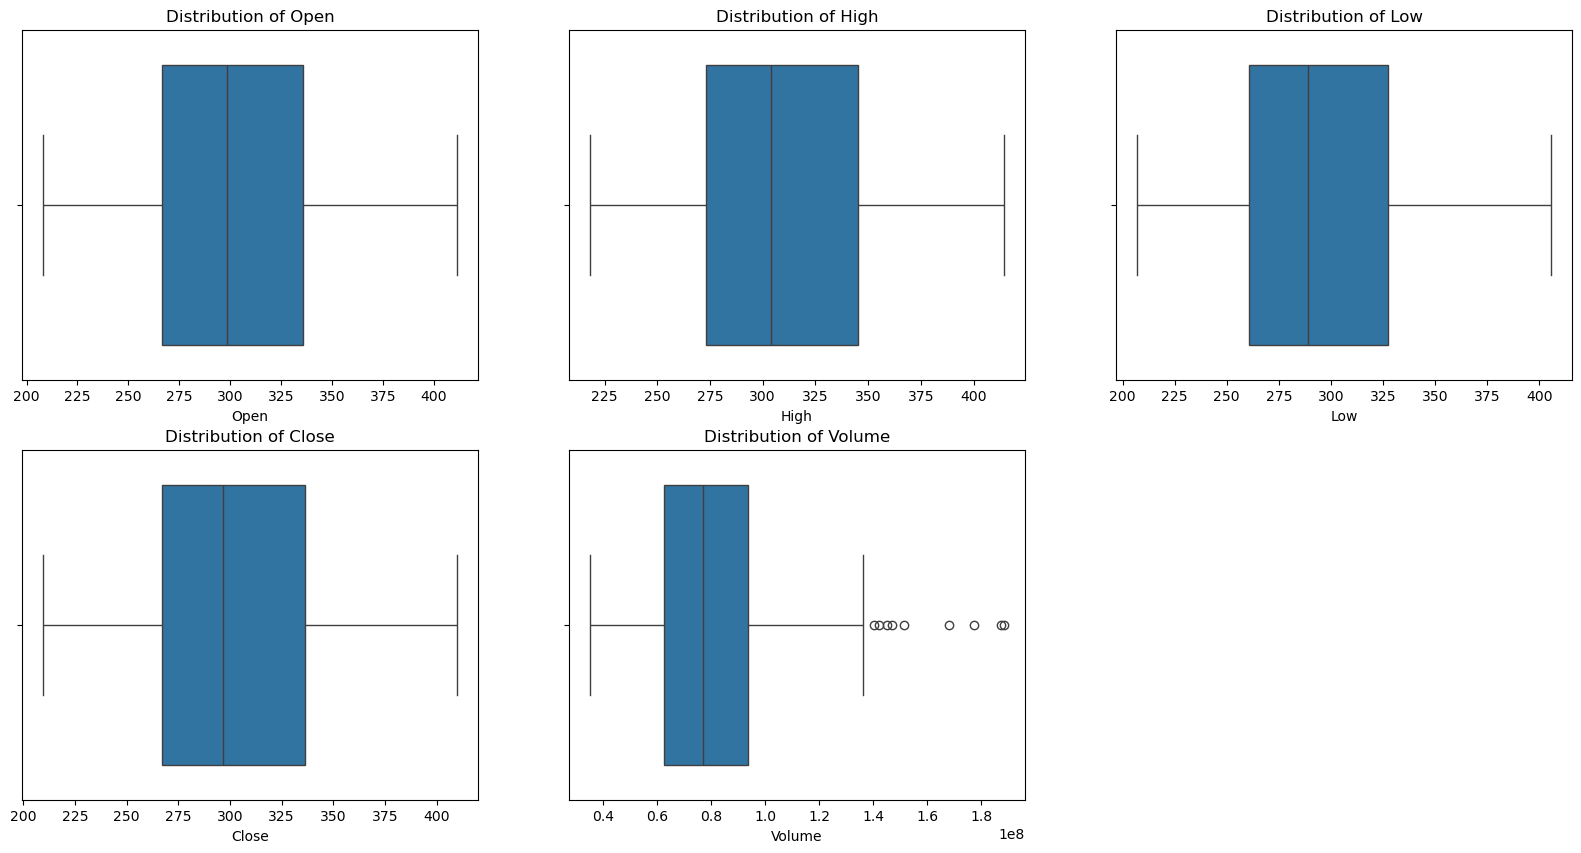

In [12]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')


In [13]:
## Remove Outlier From Volume Column
q1 = df['Volume'].quantile(0.25)
q3 = df['Volume'].quantile(0.75)
iqr = q3 - q1
df = df[(df['Volume'] >= q1 - 1.5 * iqr) & (df['Volume'] <= q3 + 1.5 * iqr)]


In [14]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,55297800


## Feature Engineering

In [15]:
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype(int)
df['month'] = splitted[1].astype(int)
df['day'] = splitted[2].astype(int)

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,62828700,2021,9,29
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,53868000,2021,9,30
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,51094200,2021,10,1
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,91449900,2021,10,4
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,55297800,2021,10,5


In [16]:
df.drop(['Date'], axis=1, inplace=True)
    

In [17]:
df.head()

,Open,High,Low,Close,Volume,year,month,day
0,259.933319,264.500000,256.893341,260.436676,62828700,2021,9,29
1,260.333344,263.043335,258.333344,258.493347,53868000,2021,9,30
2,259.466675,260.260010,254.529999,258.406677,51094200,2021,10,1
3,265.500000,268.989990,258.706665,260.510010,91449900,2021,10,4
4,261.600006,265.769989,258.066681,260.196655,55297800,2021,10,5
